Нужно: 
1) Вернуть абзацы


2) Проверить насколько комментарий является упрощением закона 


3) Проверить полноту каждого комментария. Если нет, то добавить недостающие элементы вручную


In [59]:
import pandas as pd


imp1 = pd.read_csv('important_docs1.csv', delimiter=';', encoding='windows-1251')
imp2 = pd.read_csv('important_docs2.csv', delimiter=';', encoding='windows-1251')
com1 = pd.read_csv('common_docs1.csv', delimiter=';', encoding='windows-1251')
com2 = pd.read_csv('common_docs2.csv', delimiter=';', encoding='windows-1251')
com3 = pd.read_csv('common_docs3.csv', delimiter=';', encoding='windows-1251')

Объединяем в один корпус

In [60]:
imp1

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,В том числе компания поставляет тепло и горячу...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Соответствующий документ опубликован на 10-й с...,3 февраля 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/ks-dok.html,Именем Российской Федерации Конституционный С...,В 2015 году Татьяна Малкова из Челябинской обл...,25 января 2022 г.
3,Приказ Министерства экономического развития Ро...,https://rg.ru/2022/01/25/intellekt-dok.html,"В целях реализации федерального проекта ""Искус...",Регулярный мониторинг позволит получать объект...,25 января 2022 г.
4,Приказ Министерства экономического развития Ро...,https://rg.ru/2022/01/25/rabota-dok.html,"В целях реализации федерального проекта ""Искус...",Регулярный мониторинг позволит получать объект...,25 января 2022 г.
...,...,...,...,...,...
851,"Федеральный закон от 23 мая 2016 г. N 147-ФЗ ""...",https://rg.ru/2016/05/25/ekipaj-dok.html,Принят Государственной Думой 10 мая 2016 года ...,"Закон, который подписал президент Владимир Пут...",25 мая 2016 г.
852,"Федеральный закон от 23 мая 2016 г. N 143-ФЗ ""...",https://rg.ru/2016/05/25/pensii-kategorii-dok....,Принят Государственной Думой 11 мая 2016 года ...,Закон об этом подписан президентом страны. Вст...,25 мая 2016 г.
853,Постановление Пленума Верховного Суда Российск...,https://rg.ru/2016/05/18/vstamozh-dok.html,В целях обеспечения единства практики применен...,В спорные ситуации на таможне попадают не толь...,18 мая 2016 г.
854,"Федеральный закон от 3 мая 2016 г. N 140-ФЗ ""О...",https://rg.ru/2016/05/06/duma-dok.html,Принят Государственной Думой 22 апреля 2016 го...,Хотя и раньше депутатам приходилось исключать ...,6 мая 2016 г.


In [61]:
data = pd.concat([imp1, imp2, com1, com2, com3])

In [62]:
import re

def cyr2dig(x):
    year = re.search('\d{4}', x)    
    return year.group(0)

data['Год'] = data['Дата'].apply(cyr2dig)

In [63]:
data = data.sort_values(by='Год', ascending=False)

In [64]:
del data['Год']

In [219]:
data = data.reset_index(drop=True)

In [66]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,В том числе компания поставляет тепло и горячу...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный С...,Бизнесмен Сергей Филиппов был под следствием б...,25 января 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Соответствующий документ опубликован на 10-й с...,3 февраля 2022 г.
3,Федеральный закон от 30 декабря 2021 г. N 459-...,https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 г...,По словам статс-секретаря - замглавы МЧС Росси...,10 января 2022 г.
4,Федеральный закон от 30 декабря 2021 г. N 436-...,https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 г...,На базе двух фондов создается новый Фонд разви...,10 января 2022 г.
...,...,...,...,...,...
2692,Постановление о совершенствовании госрегулиров...,https://rg.ru/2009/08/14/lekarstva-dok.html,Правительство Российской Федерации постановляе...,Производители жизненно необходимых и важнейших...,14 августа 2009 г.
2693,"Правила оплаты проезда осужденных, самостоятел...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Угол...,"Правительство утвердило новые правила, как опл...",12 августа 2009 г.
2694,Изменения в постановление правительства о него...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,Правительство Российской Федерации постановляе...,Частные охранники и детективы должны будут про...,7 августа 2009 г.
2695,Изменения в статье 144 Гражданского процессуал...,https://rg.ru/2009/04/08/gpk-izmenenie-dok.html,Принят Государственной Думой 13 марта 2009 год...,"Верховный суд разъяснил, кому переходят по нас...",8 апреля 2009 г.


In [108]:
##  смотрим статистику по датасету

df = pd.DataFrame({})

df['Text_len'] = data["Текст"].astype(str).apply(lambda x: len(x.split(' ')))
df['Comment_len'] = data['Комментарий РГ'].astype(str).apply(lambda x: len(x.split(' ')))

In [109]:
df

,Text_len,Comment_len
0,6482,262
1,4973,263
2,5975,313
3,836,265
4,14382,205
...,...,...
2692,3013,625
2693,681,327
2694,2023,173
2695,71,167


array([[<AxesSubplot:title={'center':'Text_len'}>,
        <AxesSubplot:title={'center':'Comment_len'}>]], dtype=object)

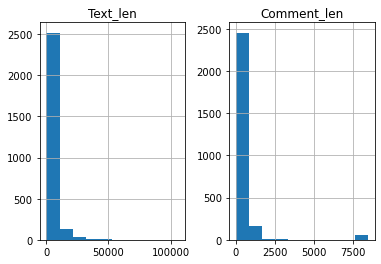

In [110]:
df.hist()

In [124]:
len([tlen for tlen in df.Text_len if tlen > 50000])

11

In [243]:
## удаляем маленькие законы

def check(article):
    if len(article.split(' ')) < 400:
        return 'DELETE'
    else:
        return article
        
data['Текст'] = data['Текст'].apply(check)

In [256]:
import numpy as np


data.drop(list(np.where(data['Текст']=='DELETE')[0]), axis = 0, inplace = True)

In [259]:
data = data.reset_index(drop=True)

In [278]:
len(data)

1879

In [310]:
## Смотрим статистику по комментариям которые больше чем 

k = []
t = []
more = []
status = []

for ind in range(len(data)):
    comm_len = len(data['Комментарий РГ'][ind].split(' '))
    zakon_len = len(data['Текст'][ind].split(' '))
    if comm_len > zakon_len:

        t.append(zakon_len)
        k.append(comm_len)
        more.append(float(comm_len/zakon_len) * -1)
        data['Комментарий РГ'][ind] = 'DELETE'
        status.append('DELETE')
    
    else:
        t.append(zakon_len)
        k.append(comm_len)
        more.append(float(zakon_len/comm_len))
        status.append('LEAVE')
        
        
times = pd.DataFrame({'Orig_len': t, 'Komm_len': k, 'Times': more, 'Status': status})

In [311]:
times

,Orig_len,Komm_len,Times,Status
0,6482,262,24.740458,LEAVE
1,4973,263,18.908745,LEAVE
2,5975,313,19.089457,LEAVE
3,836,265,3.154717,LEAVE
4,14382,205,70.156098,LEAVE
...,...,...,...,...
1874,8963,218,41.114679,LEAVE
1875,3013,625,4.820800,LEAVE
1876,681,327,2.082569,LEAVE
1877,2023,173,11.693642,LEAVE


In [312]:
times.groupby(['Status']).agg({'Times': ['min', 'max', 'mean'], 'Orig_len': ['min', 'max'], 'Komm_len': ['min', 'max']})

Times                          Orig_len         Komm_len      
             min           max       mean      min     max      min   max
Status                                                                   
DELETE -4.288984     -1.002242  -1.652703      409    1225      432  2998
LEAVE   1.032178  16639.000000  26.161069      401  106498        1  3265

In [316]:
len(times[times['Status'] == "DELETE"])

53

In [317]:
times[times['Status'] == "DELETE"]

,Orig_len,Komm_len,Times,Status
136,814,1058,-1.299754,DELETE
138,753,1058,-1.405046,DELETE
378,596,873,-1.464765,DELETE
413,856,1397,-1.632009,DELETE
434,545,642,-1.177982,DELETE
472,856,1397,-1.632009,DELETE
535,528,1037,-1.964015,DELETE
562,528,1037,-1.964015,DELETE
608,1015,1151,-1.133990,DELETE
625,451,599,-1.328160,DELETE


In [321]:
##  Удаляем отмеченные пары

data.drop(list(np.where(data['Комментарий РГ'] =='DELETE')[0]), axis = 0, inplace = True)

In [323]:
##  смотрим статистику по датасету заново

df = pd.DataFrame({})

df['Text_len'] = data["Текст"].astype(str).apply(lambda x: len(x.split(' ')))
df['Comment_len'] = data['Комментарий РГ'].astype(str).apply(lambda x: len(x.split(' ')))

In [324]:
## смотрим законы, которые подозрительно большие

df[df["Text_len"].astype(int) > 40000]
    

,Text_len,Comment_len
178,42234,442
914,56120,961
948,106498,2324
1020,47298,778
1049,73854,409
1086,56093,257
1122,74918,565
1124,74918,565
1260,48537,853
1261,70244,743


In [399]:
#  читаем эти тексты и их комментарии. Если они неактуальны, удаляем
#  178, 1049, 1086, 1260, 1377, 1413,   - good
#  914, 948, 1020, 1122, 1224, 1261, 1582, 1597, 1645 - should be deleted


## data["Текст"][1645]

In [400]:
## data['Комментарий РГ'][1645]

In [401]:
data.drop(labels = [914, 948, 1020, 1122, 1224, 1261, 1582, 1597, 1645], axis = 0, inplace = True)

In [402]:
data

,Название документа,Ссылка,Текст,Комментарий РГ,Дата
0,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/10/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,Важное для многих решение вынес Конституционны...,10 февраля 2022 г.
1,Постановление Конституционного Суда Российской...,https://rg.ru/2022/01/25/sud-dok.html,Именем Российской Федерации Конституционный С...,Конституционный суд РФ обязал суды учитывать о...,25 января 2022 г.
2,Постановление Конституционного Суда Российской...,https://rg.ru/2022/02/03/postanovlenie-dok.html,Именем Российской Федерации Конституционный С...,"Работники, чьи обязанности переданы на аутсорс...",3 февраля 2022 г.
3,Федеральный закон от 30 декабря 2021 г. N 459-...,https://rg.ru/2022/01/10/chs-dok.html,Принят Государственной Думой 15 декабря 2021 г...,"Эвакуация из опасных зон, которым грозит затоп...",10 января 2022 г.
4,Федеральный закон от 30 декабря 2021 г. N 436-...,https://rg.ru/2022/01/10/fz436-dok.html,Принят Государственной Думой 16 декабря 2021 г...,На базе двух фондов создается новый Фонд разви...,10 января 2022 г.
...,...,...,...,...,...
1874,Инструкция по организации исполнения наказаний...,https://rg.ru/2009/08/14/instrukciya-dok.html,Зарегистрирован в Минюсте РФ 25 июня 2009 г. ...,За преступления малой и средней тяжести теперь...,14 августа 2009 г.
1875,Постановление о совершенствовании госрегулиров...,https://rg.ru/2009/08/14/lekarstva-dok.html,Правительство Российской Федерации постановляе...,Производители жизненно необходимых и важнейших...,14 августа 2009 г.
1876,"Правила оплаты проезда осужденных, самостоятел...",https://rg.ru/2009/08/12/pravila-dok.html,В соответствии с частью второй статьи 751 Угол...,"Правительство утвердило новые правила, как опл...",12 августа 2009 г.
1877,Изменения в постановление правительства о него...,https://rg.ru/2009/08/07/sysk-izmenenia-dok.html,Правительство Российской Федерации постановляе...,Частные охранники и детективы должны будут про...,7 августа 2009 г.


In [403]:
data.to_csv('corpus.csv', index=False)

In [ ]:
##  дальше исправляем комменатрии, которые по каким-то причинам не запарсились полностью

In [84]:
data['Текст'][3]

'Принят Государственной Думой 15 декабря 2021 года  Одобрен Советом Федерации 24 декабря 2021 года  Внести в Федеральный закон от 21 декабря 1994 года N 68-ФЗ "О защите населения и территорий от чрезвычайных ситуаций природного и техногенного характера" (Собрание законодательства Российской Федерации, 1994, N 35, ст. 3648; 2002, N 44, ст. 4294; 2004, N 35, ст. 3607; 2006, N 50, ст. 5284; 2009, N 48, ст. 5717; 2010, N 21, ст. 2529; N 31, ст. 4192; 2011, N 1, ст. 24, 54; 2012, N 14, ст. 1549; 2013, N 7, ст. 610; N 27, ст. 3450; N 52, ст. 6969; 2014, N 42, ст. 5615; 2015, N 10, ст. 1408; N 18, ст. 2622; N 48, ст. 6723; 2016, N 1, ст. 68; N 7, ст. 919; N 26, ст. 3887; 2018, N 32, ст. 5113; 2019, N 27, ст. 3524; 2020, N 14, ст. 2028; N 26, ст. 3999; 2021, N 22, ст. 3690; N 24, ст. 4188) следующие изменения:  1) в статье 41:  а) дополнить пунктами 24 и 25 следующего содержания:  "24. Правительственная комиссия по предупреждению и ликвидации чрезвычайных ситуаций и обеспечению пожарной безопа

In [83]:
data['Комментарий РГ'][3]

'Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововведения следуют из поправок к закону N 68-ФЗ "О защите населения и территорий от чрезвычайных ситуаций природного и техногенного характера", которые накануне нового года были приняты Госдумой в окончательном чтении.  \n\n По словам статс-секретаря - замглавы МЧС России Алексея Серко, который и представлял в Думе эту законодательную инициативу, закон направлен на защиту населения только от природных и техногенных ЧС и никак не регулирует ситуации, связанные с COVID-19.  "Например, лесные пожары. Сейчас в случае, если огонь подходит к населенному пункту, сотрудникам ведомства приходится задействовать дополнительные силы и средства не только на тушение, а еще и на обход домов и убеждение жителей эвакуироваться, спасаться не столько от пожара, сколько от того же дыма.  При этом не всех возможно убедить, а закон этот вопрос до сих пор не регулировал. В итоге зачастую мы вынуждены пострадавших вын

In [82]:
text = '''Эвакуация из опасных зон, которым грозит затопление или пожары, будет обязательной. Такие нововведения следуют из поправок к закону N 68-ФЗ "О защите населения и территорий от чрезвычайных ситуаций природного и техногенного характера", которые накануне нового года были приняты Госдумой в окончательном чтении.  '''

data['Комментарий РГ'][3] = text + '\n\n ' + data['Комментарий РГ'][3]

In [130]:
data = data.astype(str)


In [218]:
data['Текст'][1159]

'1. В сответствии с пунктом "д" статьи 83 Конституции Российской Федерации назначить Якушева Владимира Владимировича Министром строительства и жилищно-коммунального хозяйства Российской Федерации, приняв его отставку с должности Губернатора Тюменской области по собственному желанию.  2. Настоящий Указ вступает в силу со дня его подписания.  Президент Российской Федерации В. Путин  '

KeyError: '[505, 769, 815, 1048, 1051, 1053, 1055, 1056, 1057, 1059, 1063, 1064, 1065, 1066, 1069, 1070, 1071] not found in axis'